## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [305]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

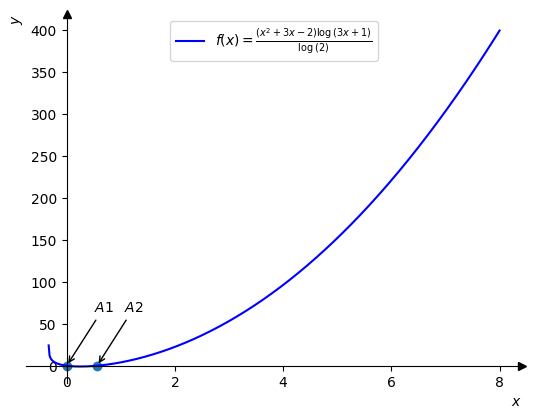

In [306]:
# if sys.version_info >= (3, 10), this function can be used:
# def f(x, library="sympy"):
#     match library:
#         case "sympy":
#             return (x**2 + 3*x - 2) * sympy.log(3*x + 1, 2)
#         case "numpy":
#             return (x**2 + 3*x - 2) * np.log2(3*x + 1)
#         case _:
#             raise ValueError("Incorrect library name")

def f(x, library="sympy"):
    if library == "sympy":
        return (x**2 + 3*x - 2) * sympy.log(3*x + 1, 2)
    if library == "numpy":
        return (x**2 + 3*x - 2) * np.log2(3*x + 1)
    raise ValueError("Incorrect library name")

def config_ax(ax):
    ax.legend(loc="upper center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = Symbol('x')
domain = continuous_domain(f(x), x, domain=S.Reals)
x_coords = [point for point in solve(f(x), x) if point in domain]
y_coords = [S(0)]*len(x_coords)
f_intersect_oy = f(S(0))
if f_intersect_oy not in y_coords:
    y_coords.append(f_intersect_oy)
    x_coords.append(S(0))

ax = plt.gca()

# Plot f(x).
x_space = np.linspace(float(domain.left) + 0.001, 8, 512)
ax.plot(
    x_space, 
    f(x_space, "numpy"),
    'b',
    label=f"$f(x) = {latex(f(x))}$"
)
ax.scatter(x_coords, y_coords)
# Config current axes after plotting because of label configuration.
config_ax(ax)

# Add annotations.
for i, x_coord in enumerate(x_coords):
    y_coord = y_coords[i]
    ax.annotate(
        f"$A{i + 1}$",
        xy=(x_coord, y_coord),
        xytext=(x_coord + 0.5, y_coord + 64),
        arrowprops={
            "arrowstyle": "->",
            "connectionstyle": "arc3",
        }
    )


### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

Vertical asymptotes:


2/3

lim when x -> -oo:


-oo

lim when x -> +oo:


oo

k when x -> -oo:


35/3

k when x -> +oo:


35/3

Oblique asymptote equation:


35*x/3 + 82/9

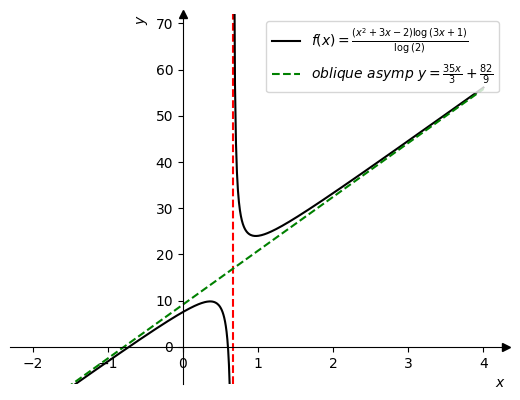

In [307]:
def g(x):
    return (35*x**2 + 4*x - 15) / (3*x - 2)

def config_ax(ax):
    ax.legend(loc="upper right")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = symbols('x')
numerator, denominator = sympy.fraction(g(x))
vert_asymptotes = solve(denominator)
print("Vertical asymptotes:")
display(*vert_asymptotes)

lim_neg = g(x).limit(x, -sympy.oo)
lim_pos = g(x).limit(x, +sympy.oo)
print("lim when x -> -oo:")
display(lim_neg)
print("lim when x -> +oo:")
display(lim_pos)

k_neg = sympy.limit(g(x)/x, x, -sympy.oo)
print("k when x -> -oo:")
display(k_neg)
k_pos = sympy.limit(g(x)/x, x, +sympy.oo)
print("k when x -> +oo:")
display(k_pos)
k = k_pos if k_pos == k_neg else (k_pos, k_neg)
b = sympy.limit(g(x) - k*x, x, +sympy.oo)
obliq_asymptote = k*x + b
print("Oblique asymptote equation:")
display(obliq_asymptote)

ax = plt.gca()
ax.set_ylim((-8, 72))

for asymp in vert_asymptotes:
    ax.axvline(x=asymp, color='r', linestyle='--')

left_x = np.linspace(-2, float(asymp)-0.001, 256)
right_x = np.linspace(float(asymp)+0.001, 4, 256)
left_y = g(left_x)
right_y = g(right_x)

ax.plot(left_x, left_y, "k-", label=f"$f(x) = {latex(f(x))}$")
ax.plot(right_x, right_y, "k-")

obliq_asymp_x = (left_x[0], right_x[-1])
obliq_asymp_y = (obliq_asymptote.subs(x, left_x[0]), obliq_asymptote.subs(x, right_x[-1]))
ax.plot(obliq_asymp_x, obliq_asymp_y, "g--", label=f"$oblique$ $asymp$ $y = {latex(obliq_asymptote)}$")

config_ax(ax)


### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

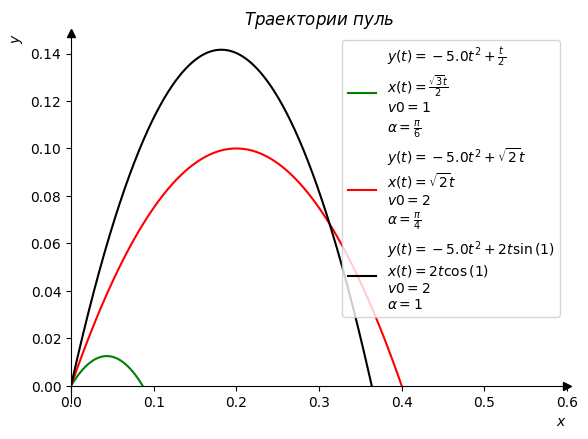

In [308]:
def config_ax(ax):
    ax.set_title("$Траектории$ $пуль$")
    ax.legend(loc="upper right")
    ax.set_xlim((0, 0.6))
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


def x_y_system_t(t, v0, alpha, g: float=10.0):
    return (v0 * t * sympy.cos(alpha), v0 * t * sympy.sin(alpha) - g * t * t / 2)

def plot_bullet(ax, v0, alpha, color: str):
    t = Symbol('t')
    x, y = x_y_system_t(t, v0, alpha)
    t_start, t_end = solve(y, t)
    x_space = np.linspace(float(x.subs(t, t_start)), float(x.subs(t, t_end)), 512)
    y_space = [y.subs(t, t_i) for t_i in np.linspace(float(t_start), float(t_end), 512)]
    ax.plot(
        x_space, 
        y_space,
        color,
        label=f"$y(t) = {latex(y)}$\n$x(t) = {latex(x)}$\n$v0 = {latex(v0)}$\n$\\alpha = {latex(alpha)}$"
    )

params = (
    (1, sympy.pi/6, 'g'),
    (2, sympy.pi/4, 'r'),
    (2, 1, 'k')
)

ax = plt.gca()
for t, alpha, color in params:
    plot_bullet(ax, t, alpha, color) 
config_ax(ax)

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

Построить в одной координатной плоскости графики функций f (x) = 2x + 2, g(x) = 2 sin (2x) на отрезке
[0, π/2], f (x) зеленая пунктирная линия, g(x) фиолетовая линия из точек. Отметки на горизонтальной оси от 0
до π/2 с шагом π/4, отметки подписать формулами как в Примере 3. По вертикальной оси отметки −2, 0, 2.

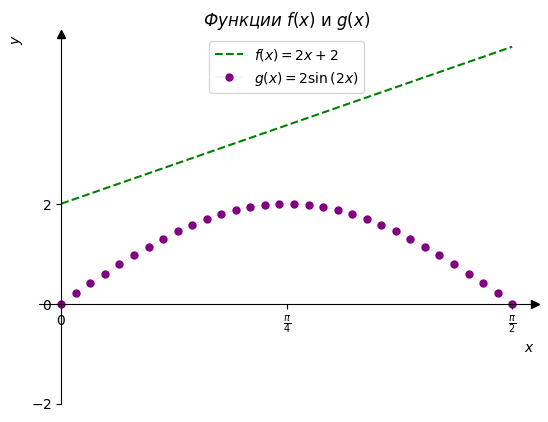

In [310]:
def config_ax(ax):
    ax.set_title("$Функции$ $f(x)$ и $g(x)$")
    ax.legend(loc="upper center")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.set_xticks([np.pi*n/4 for n in range(3)])
    ax.set_xticklabels([r'$' + latex(sympy.pi*n/4) + r'$' for n in range(3)]) 
    ax.set_yticks([2*n - 2 for n in range(3)])
    ax.set_yticklabels([f"${latex(2*n - 2)}$" for n in range(3)])

def f(x):
    return 2*x + 2

def g(x, lib="numpy"):
    if lib == "numpy":
        return 2*np.sin(2*x)
    if lib == "sympy":
        return 2*sympy.sin(2*x)
    return "Wrong library. Should be numpy or sympy"

ax = plt.gca()
x = Symbol('x')
x_space = np.linspace(0, np.pi/2, 32)
y_space_1 = f(x_space)
y_space_2 = g(x_space)

ax.plot(x_space, y_space_1, "g--", label=f"$f(x) = {latex(f(x))}$")
ax.plot(x_space, y_space_2, color='purple', marker='o', linestyle='dashed', linewidth=0.1, markersize=5, label=f"$g(x) = {latex(g(x, 'sympy'))}$")
config_ax(ax)